<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [71]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovateable:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [72]:
# Load the data
house = pd.read_csv('./housing.csv')

In [73]:
house.shape

(1460, 81)

In [74]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [75]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [76]:
pd.set_option('display.max_rows',100)
# to display all column names for next bit of code

In [77]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [78]:
house[house['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtExposure']].head()
# wanted to see whether they share the same null values

,BsmtQual,BsmtCond,BsmtExposure
17,NaN,NaN,NaN
39,NaN,NaN,NaN
90,NaN,NaN,NaN
102,NaN,NaN,NaN
156,NaN,NaN,NaN


In [79]:
# house[house['Alley'].notnull()]

In [80]:
# [house[house[i].isnull()] for i in house.columns]

In [81]:
# house[house['Fence'].notnull()]['Fence']

In [82]:
# house[house['MiscFeature'].notnull()]['MiscFeature'].head()

In [83]:
house.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)
# all of these have too many null values, and so I decided to drop these columns

In [84]:
house = house[house['BsmtExposure'].notnull()]

In [85]:
house = house[house['BsmtQual'].notnull()]

In [86]:
house = house[house['GarageType'].notnull()]

In [87]:
house = house[house['MasVnrType'].notnull()]

In [88]:
house = house[house['BsmtFinType2'].notnull()]

In [89]:
house = house[house['Electrical'].notnull()]

In [90]:
# removed the rows containing null vlaues in the 6 columns above - many of these share null values in the same rows
# and because there were very few null values, I think it is reasonable to drop them

In [91]:
house[house['LotFrontage'].notnull()]['LotFrontage'].mean()

70.75959780621572

In [92]:
house['LotFrontage'].fillna(house['LotFrontage'].mean(), inplace=True)

In [93]:
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [94]:
# house.isnull().sum()

In [95]:
house['MSZoning'].value_counts()

RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64

In [96]:
house = house[house['MSZoning'] != 'C (all)']
# 'C (all)' is non-residential, and so I dropped these

In [97]:
house.shape

(1330, 76)

In [98]:
house.isnull().sum().head()
# to check whether all null values are now gone

Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
dtype: int64

In [99]:
list(house.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3Ssn

In [100]:
non_renovatable = house[['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'SalePrice']]

In [101]:
# chose only non-renovatable features

In [102]:
sorted_nr = non_renovatable.sort_values(by=['YrSold'])
sorted_nr_dummies = pd.get_dummies(sorted_nr, drop_first=True)
# dummifies columns

In [103]:
pre2010_sorted_nr = sorted_nr_dummies[sorted_nr_dummies['YrSold'] != 2010]
pre2010_sorted_nr

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
232,160,21.0,1680,1972,1972,297.0,0,0,483,483,...,0,0,0,0,1,0,0,0,1,0
1223,20,89.0,10680,1951,1951,44.0,756,0,1380,2136,...,0,0,0,0,1,0,0,0,1,0
281,20,60.0,7200,2006,2006,68.0,905,0,357,1262,...,0,0,1,0,0,0,0,0,0,1
990,60,82.0,9452,1997,1998,423.0,1074,0,322,1396,...,0,0,0,0,1,0,0,0,1,0
989,60,65.0,8125,2006,2006,0.0,0,0,770,770,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,70,121.0,17671,1882,1986,0.0,216,0,700,916,...,0,0,0,0,1,0,0,0,1,0
494,30,50.0,5784,1938,1996,0.0,0,0,190,190,...,0,0,0,0,1,0,0,0,1,0
1100,30,60.0,8400,1920,1950,0.0,290,0,0,290,...,0,0,0,0,1,0,0,0,1,0
440,20,105.0,15431,2008,2008,200.0,1767,539,788,3094,...,0,0,0,0,1,0,0,0,1,0


In [104]:
in2010_sorted_nr = sorted_nr_dummies[sorted_nr_dummies['YrSold'] >= 2010]
in2010_sorted_nr.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1380,30,45.000000,8212,1914,1950,0.0,203,0,661,864,...,0,0,0,0,1,0,0,0,1,0
385,120,43.000000,3182,2004,2005,16.0,24,0,1232,1256,...,0,0,0,0,1,0,0,0,1,0
861,190,75.000000,11625,1965,1965,0.0,841,0,198,1039,...,0,0,0,0,1,0,0,0,1,0
1385,50,40.000000,5436,1922,2007,0.0,735,0,61,796,...,0,0,0,0,1,0,0,0,1,0
1396,20,70.759598,57200,1948,1950,0.0,353,334,60,747,...,0,0,0,0,1,0,0,0,1,0


In [105]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [106]:
X_train = pre2010_sorted_nr.copy()
X_test = in2010_sorted_nr.copy()
y_train = X_train.pop('SalePrice')
y_test =  X_test.pop('SalePrice')

In [107]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [108]:
model = LinearRegression()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8658028070857069
0.8638043500664707


In [109]:
print('Intercept:', model.intercept_)
pd.DataFrame(list(zip(X_train.columns, model.coef_)))

Intercept: 187645.2188748574


,0,1
0,MSSubClass,-3592.802671
1,LotFrontage,-3939.975233
2,LotArea,8056.109824
3,YearBuilt,6936.291286
4,YearRemodAdd,5769.695864
...,...,...
126,SaleCondition_AdjLand,1149.000000
127,SaleCondition_Alloca,2180.000000
128,SaleCondition_Family,-96.000000
129,SaleCondition_Normal,1856.000000


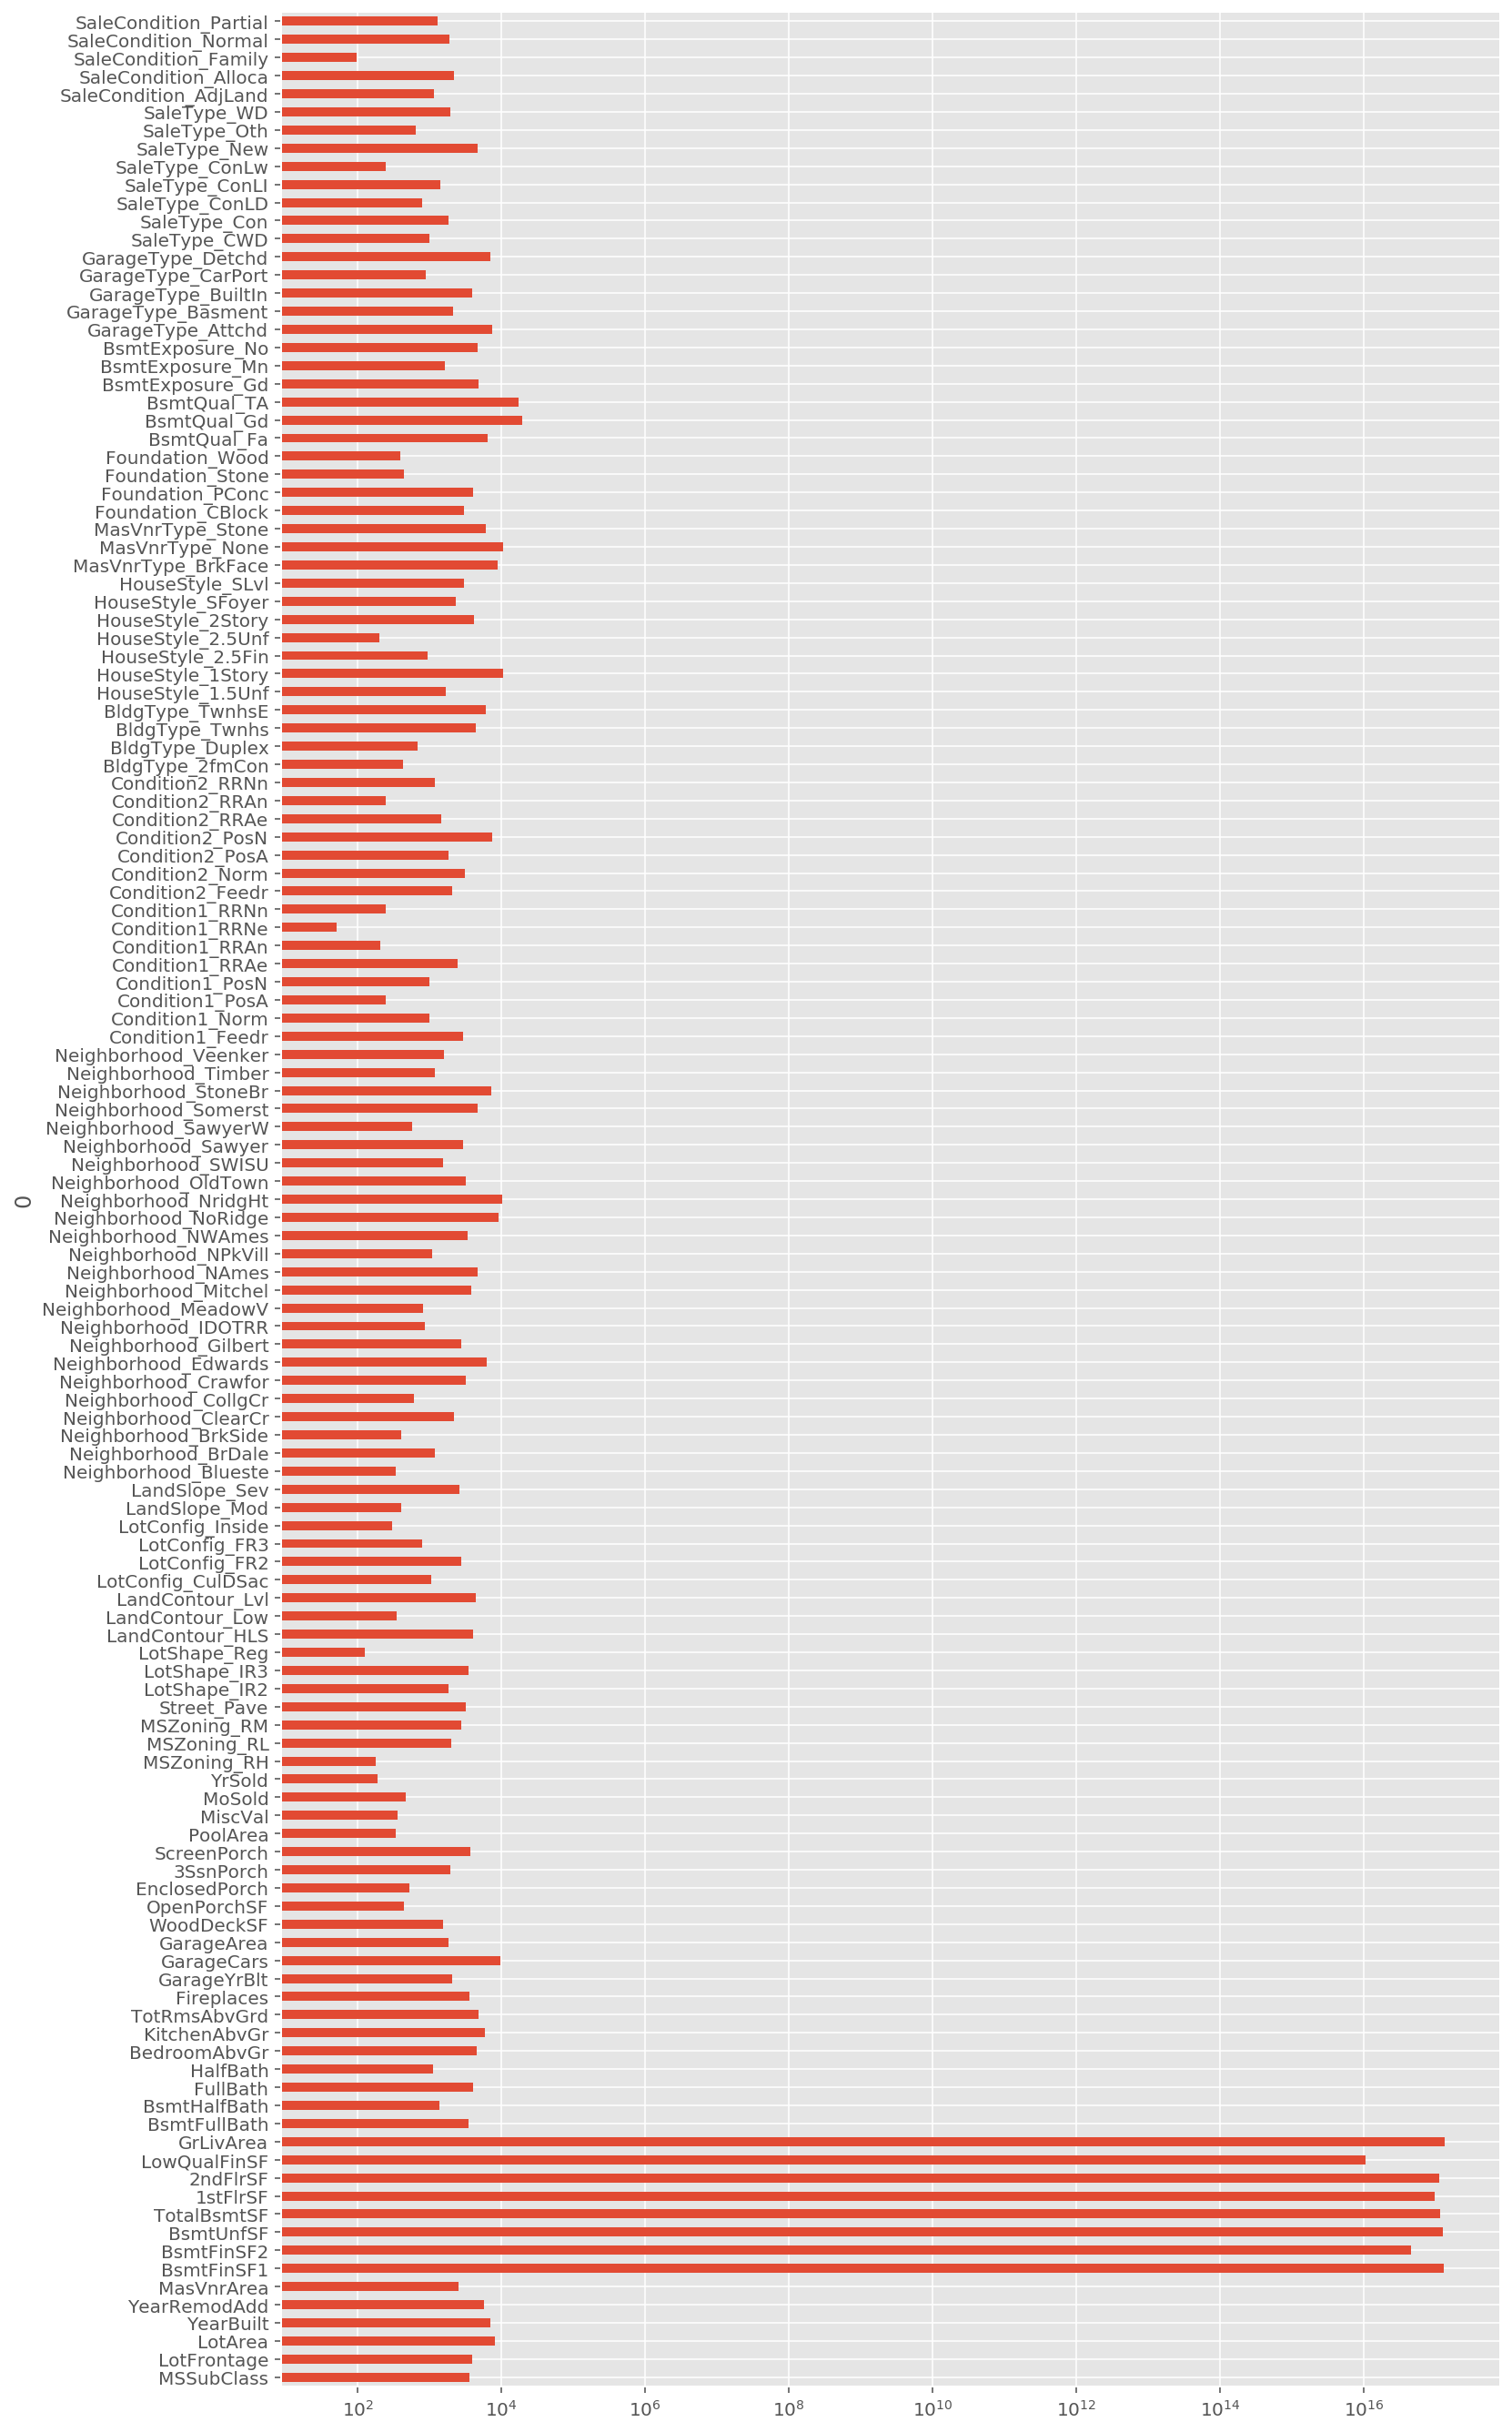

In [110]:
pd.DataFrame(list(zip(X_train.columns, np.abs(model.coef_)))
             ).plot(kind='barh', x=0, y=1, figsize=(12, 24), legend=False)
plt.xscale('log')
plt.show()

In [111]:
model1 = ElasticNetCV(n_alphas = 100, 
                     l1_ratio = np.linspace(0.01, 1.0, 25), cv=5)

In [112]:
# fit the model
model1.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model1.alpha_)
best_alpha = model1.alpha_
print('Best l1-ratio:', model1.l1_ratio_)
best_l1_ratio = model1.l1_ratio_

print('Training score:', model1.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model1.score(X_test, y_test))

Best alpha: 1046.0114738974173
Best l1-ratio: 1.0
Training score: 0.8452261686052454
Test Score: 0.8659121309385877


In [113]:
model2 = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
model2.fit(X_train, y_train)

print('Training score:', model2.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model2.score(X_test, y_test))

Training score: 0.8452261686052454
Test Score: 0.8659121309385877


In [114]:
model = LassoCV(n_alphas=200, cv=5)
model.fit(X_train, y_train)
alpha_optimal = model.alpha_

print(pd.DataFrame(list(zip(X_train.columns, np.around(model.coef_, 3)))))
print()
print('Training score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

                         0         1
0               MSSubClass -6964.447
1              LotFrontage    -0.000
2                  LotArea  3252.493
3                YearBuilt  7284.405
4             YearRemodAdd  6641.181
..                     ...       ...
126  SaleCondition_AdjLand     0.000
127   SaleCondition_Alloca   199.412
128   SaleCondition_Family  -333.499
129   SaleCondition_Normal     0.000
130  SaleCondition_Partial     0.000

[131 rows x 2 columns]

Training score: 0.8455531934219316
Test score: 0.8661054843499114


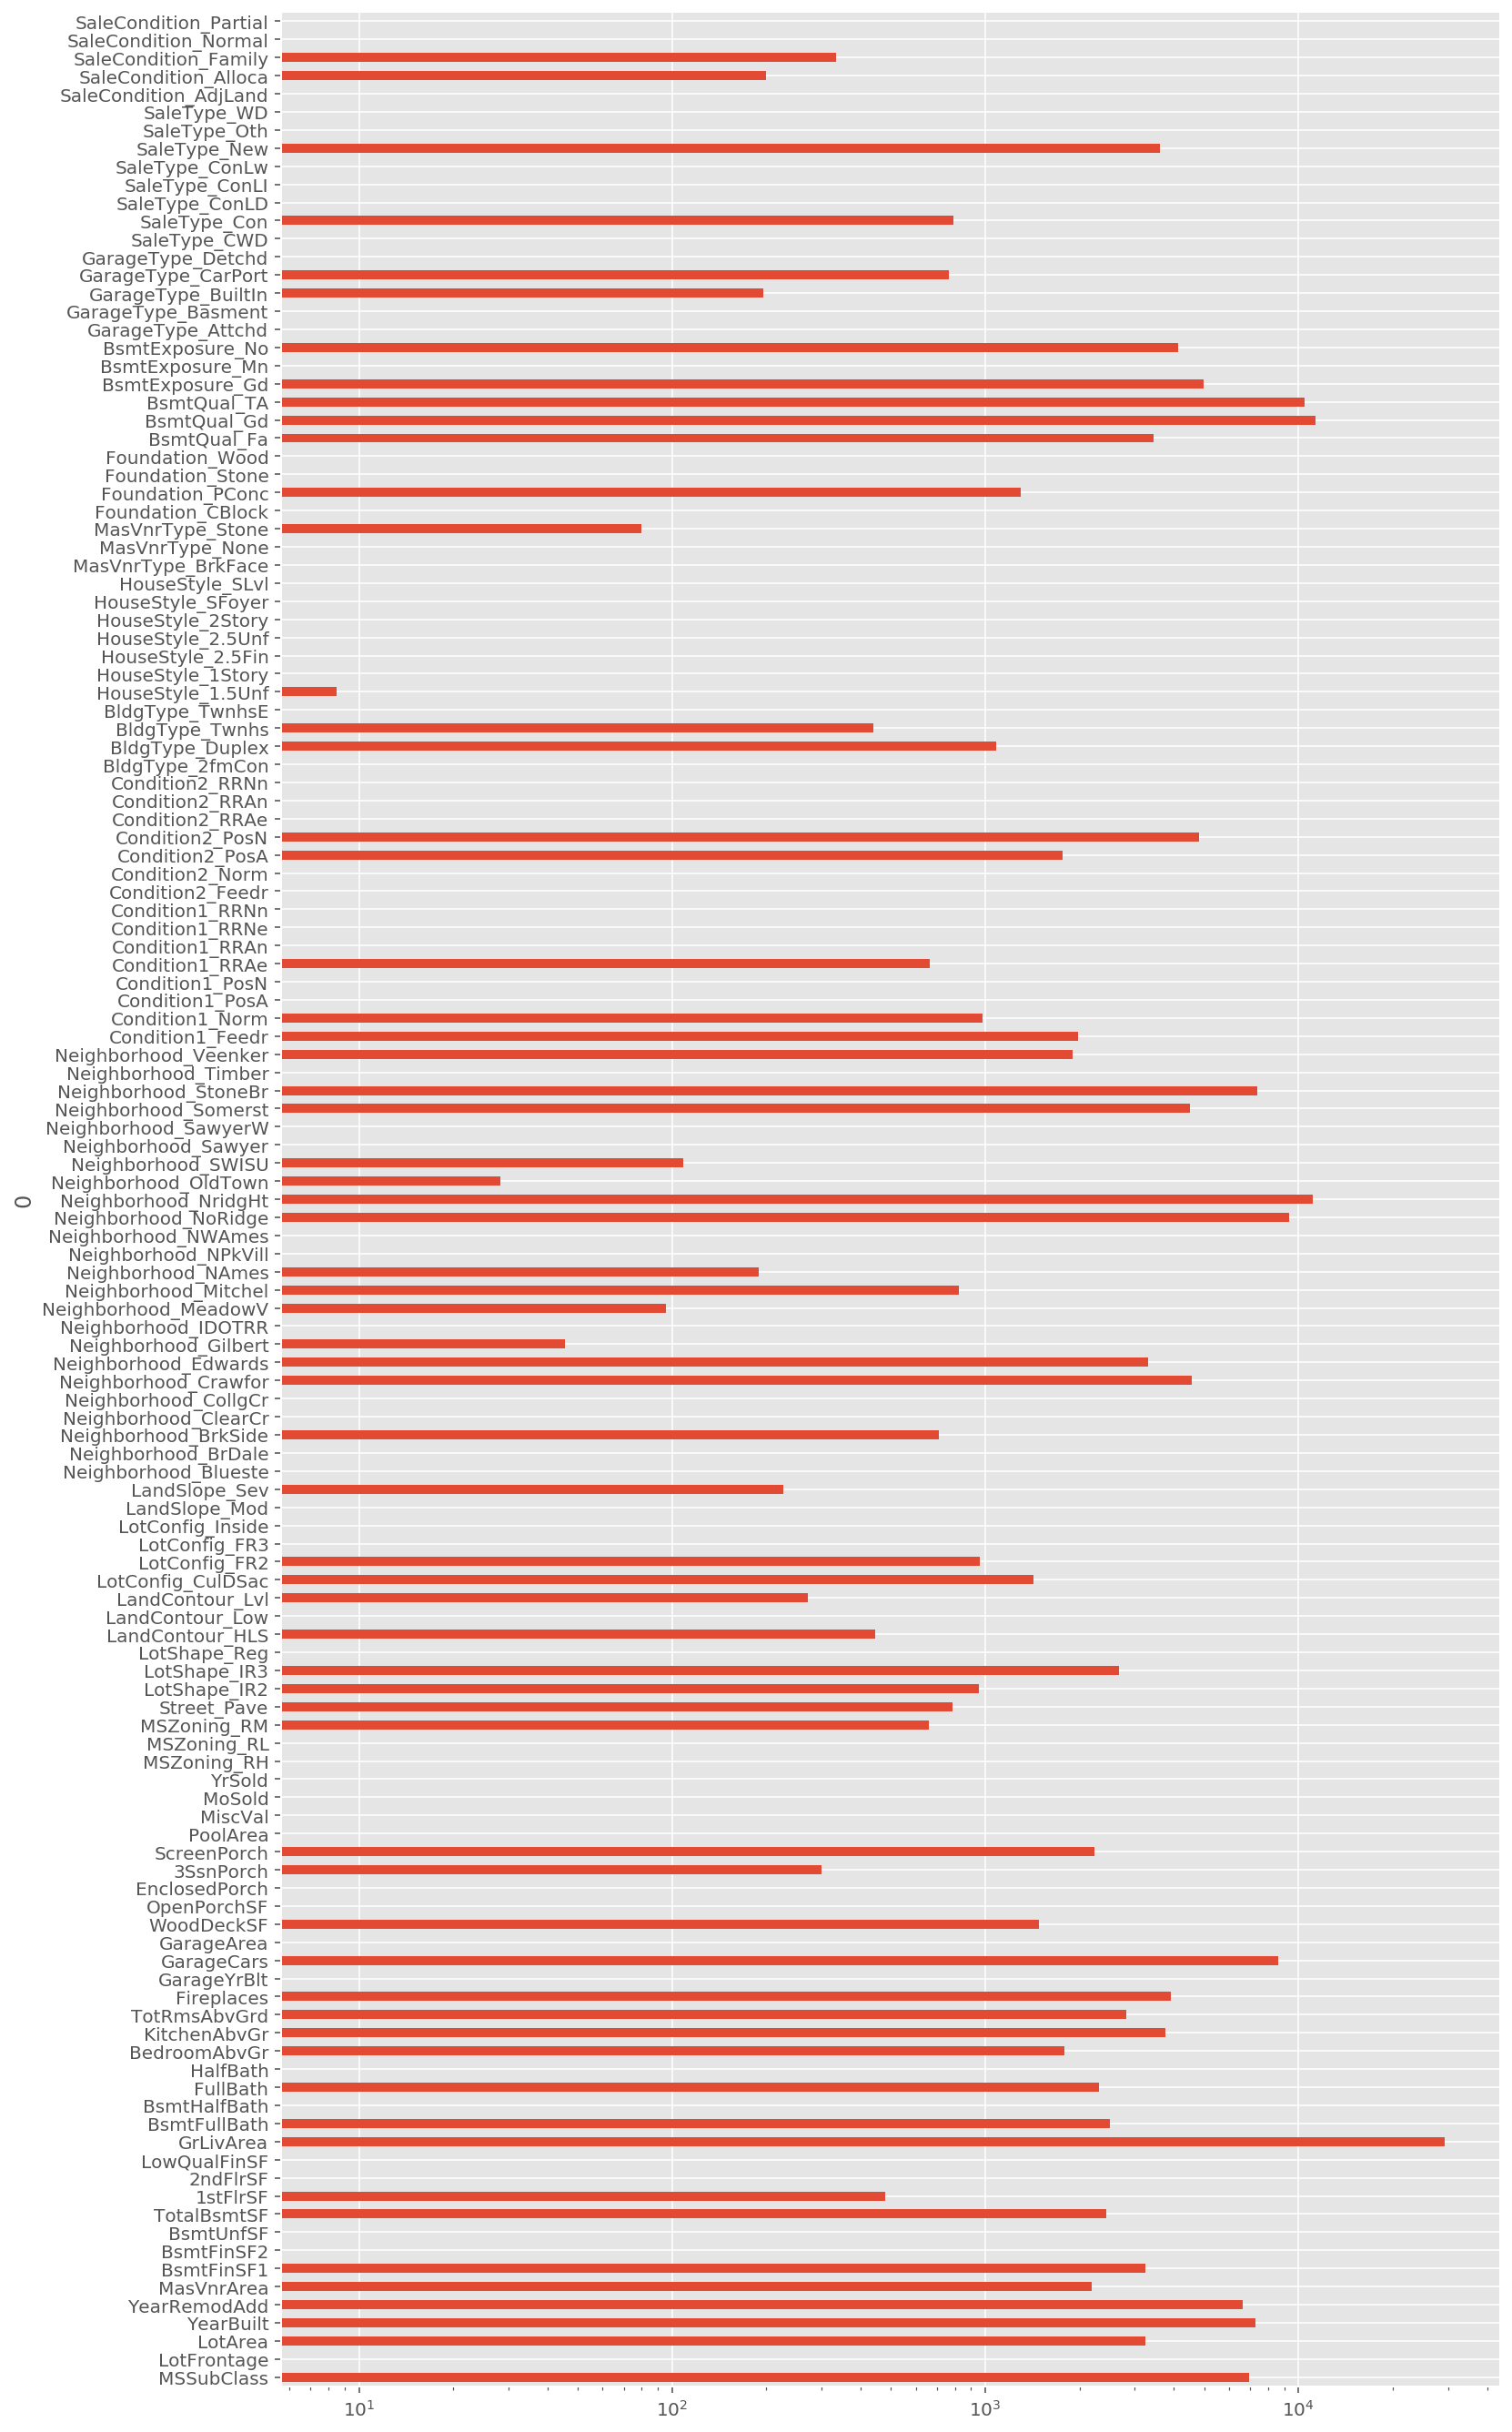

In [115]:
pd.DataFrame(list(zip(X_train.columns, np.abs(model.coef_)))
             ).plot(kind='barh', x=0, y=1, figsize=(12, 24), legend=False)
plt.xscale('log')
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovatable features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [116]:
# A:


In [117]:
# y = beta_0+beta_1 x_1 + epsilon_non_renovatable
# epsilon_non_renovatable = beta_r_0+beta_r_1 xr_1+epsilon_renovatable
# y = beta_0+beta_1 x_1 +beta_r_0+beta_r_1 xr_1+epsilon_renovatable

In [118]:
# take the actual Y minus your predicted

# which gives your residuals

# and then run the regression on that

In [119]:
y_train_residuals = y_train - model2.predict(X_train)
y_test_residuals = y_test - model2.predict(X_test)

In [120]:
y_test_residuals

1380   -17667.723949
385     24524.504155
861      9483.810148
1385     -944.608077
1396   -35974.755487
            ...     
353     -2959.369519
162    -57006.819428
503     39510.182321
158     24563.049005
634     28614.988715
Name: SalePrice, Length: 157, dtype: float64

In [121]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [122]:
renovatable = house[['Id',
       'Utilities',
       'OverallQual',
        'OverallCond', 
        'RoofStyle',
       'RoofMatl', 
        'Exterior1st', 
        'Exterior2nd',
       'ExterQual', 
        'ExterCond',
        'BsmtCond',
       'BsmtFinType1', 
        'BsmtFinType2',
       'Heating', 
        'HeatingQC',
       'CentralAir', 
        'Electrical',
       'KitchenQual',
       'Functional', 
        'Fireplaces',
        'GarageFinish',
       'GarageQual', 
        'GarageCond', 
        'PavedDrive',
        'YrSold']]

In [123]:
renovatable

,Id,Utilities,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,...,CentralAir,Electrical,KitchenQual,Functional,Fireplaces,GarageFinish,GarageQual,GarageCond,PavedDrive,YrSold
0,1,AllPub,7,5,Gable,CompShg,VinylSd,VinylSd,Gd,TA,...,Y,SBrkr,Gd,Typ,0,RFn,TA,TA,Y,2008
1,2,AllPub,6,8,Gable,CompShg,MetalSd,MetalSd,TA,TA,...,Y,SBrkr,TA,Typ,1,RFn,TA,TA,Y,2007
2,3,AllPub,7,5,Gable,CompShg,VinylSd,VinylSd,Gd,TA,...,Y,SBrkr,Gd,Typ,1,RFn,TA,TA,Y,2008
3,4,AllPub,7,5,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,...,Y,SBrkr,Gd,Typ,1,Unf,TA,TA,Y,2006
4,5,AllPub,8,5,Gable,CompShg,VinylSd,VinylSd,Gd,TA,...,Y,SBrkr,Gd,Typ,1,RFn,TA,TA,Y,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,AllPub,6,5,Gable,CompShg,VinylSd,VinylSd,TA,TA,...,Y,SBrkr,TA,Typ,1,RFn,TA,TA,Y,2007
1456,1457,AllPub,6,6,Gable,CompShg,Plywood,Plywood,TA,TA,...,Y,SBrkr,TA,Min1,2,Unf,TA,TA,Y,2010
1457,1458,AllPub,7,9,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,...,Y,SBrkr,Gd,Typ,2,RFn,TA,TA,Y,2010
1458,1459,AllPub,5,6,Hip,CompShg,MetalSd,MetalSd,TA,TA,...,Y,FuseA,Gd,Typ,0,Unf,TA,TA,Y,2010


In [124]:
new_sorted_nr = renovatable.sort_values(by=['YrSold'])
new_sorted_nr_dummies = pd.get_dummies(new_sorted_nr, drop_first=True)

In [125]:
new_pre2010_sorted_nr = new_sorted_nr_dummies[new_sorted_nr_dummies['YrSold'] != 2010]
new_pre2010_sorted_nr

,Id,OverallQual,OverallCond,Fireplaces,YrSold,Utilities_NoSeWa,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
232,233,6,5,1,2006,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1223,1224,5,3,0,2006,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
281,282,6,5,0,2006,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
990,991,8,5,1,2006,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
989,990,7,5,0,2006,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,992,8,9,1,2009,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
494,495,5,8,0,2009,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1100,1101,2,5,0,2009,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
440,441,10,5,2,2009,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [126]:
new_in2010_sorted_nr = new_sorted_nr_dummies[new_sorted_nr_dummies['YrSold'] >= 2010]
new_in2010_sorted_nr.head()

,Id,OverallQual,OverallCond,Fireplaces,YrSold,Utilities_NoSeWa,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
1380,1381,3,3,0,2010,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
385,386,8,5,1,2010,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
861,862,5,4,0,2010,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1385,1386,4,8,0,2010,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1396,1397,5,5,2,2010,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [127]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV


In [128]:
new_pre2010_sorted_nr.shape

(1173, 98)

In [129]:
y_train_residuals.shape

(1173,)

In [130]:
X_train = new_pre2010_sorted_nr.copy()
X_test = new_in2010_sorted_nr.copy()
y_train = pd.DataFrame(y_train_residuals)
y_test =  pd.DataFrame(y_test_residuals)

In [131]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1173, 98)
(157, 98)
(1173, 1)
(157, 1)


In [132]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

model = LinearRegression()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.3897933747102854
0.22175281218767462


In [133]:
model1 = ElasticNetCV(n_alphas = 100, 
                     l1_ratio = np.linspace(0.01, 1.0, 25), cv=5)

In [134]:
# fit the model
model1.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model1.alpha_)
best_alpha = model1.alpha_
print('Best l1-ratio:', model1.l1_ratio_)
best_l1_ratio = model1.l1_ratio_

print('Training score:', model1.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model1.score(X_test, y_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha: 1118.1424584478193
Best l1-ratio: 1.0
Training score: 0.18608089638112824
Test Score: 0.0940305832585796


In [135]:
model2 = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
model2.fit(X_train, y_train)

print('Training score:', model2.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model2.score(X_test, y_test))

Training score: 0.18608089638112824
Test Score: 0.0940305832585796


In [136]:
# create a RidgeCV model instance
model = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 1291.5496650148827
Training score: 0.16988071046738307
Test Score: 0.10202867492612988


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [163]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_.T, 
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['columns']=X_train.columns
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.head()

,coefficients,columns,coef_abs
0,-289.215496,Id,289.215496
1,2619.115380,OverallQual,2619.115380
2,2555.883817,OverallCond,2555.883817
3,-333.714185,Fireplaces,333.714185
4,17.769887,YrSold,17.769887


In [167]:
df_coef.set_index('columns', inplace=True)

In [168]:
df_coef = df_coef.iloc[1:]

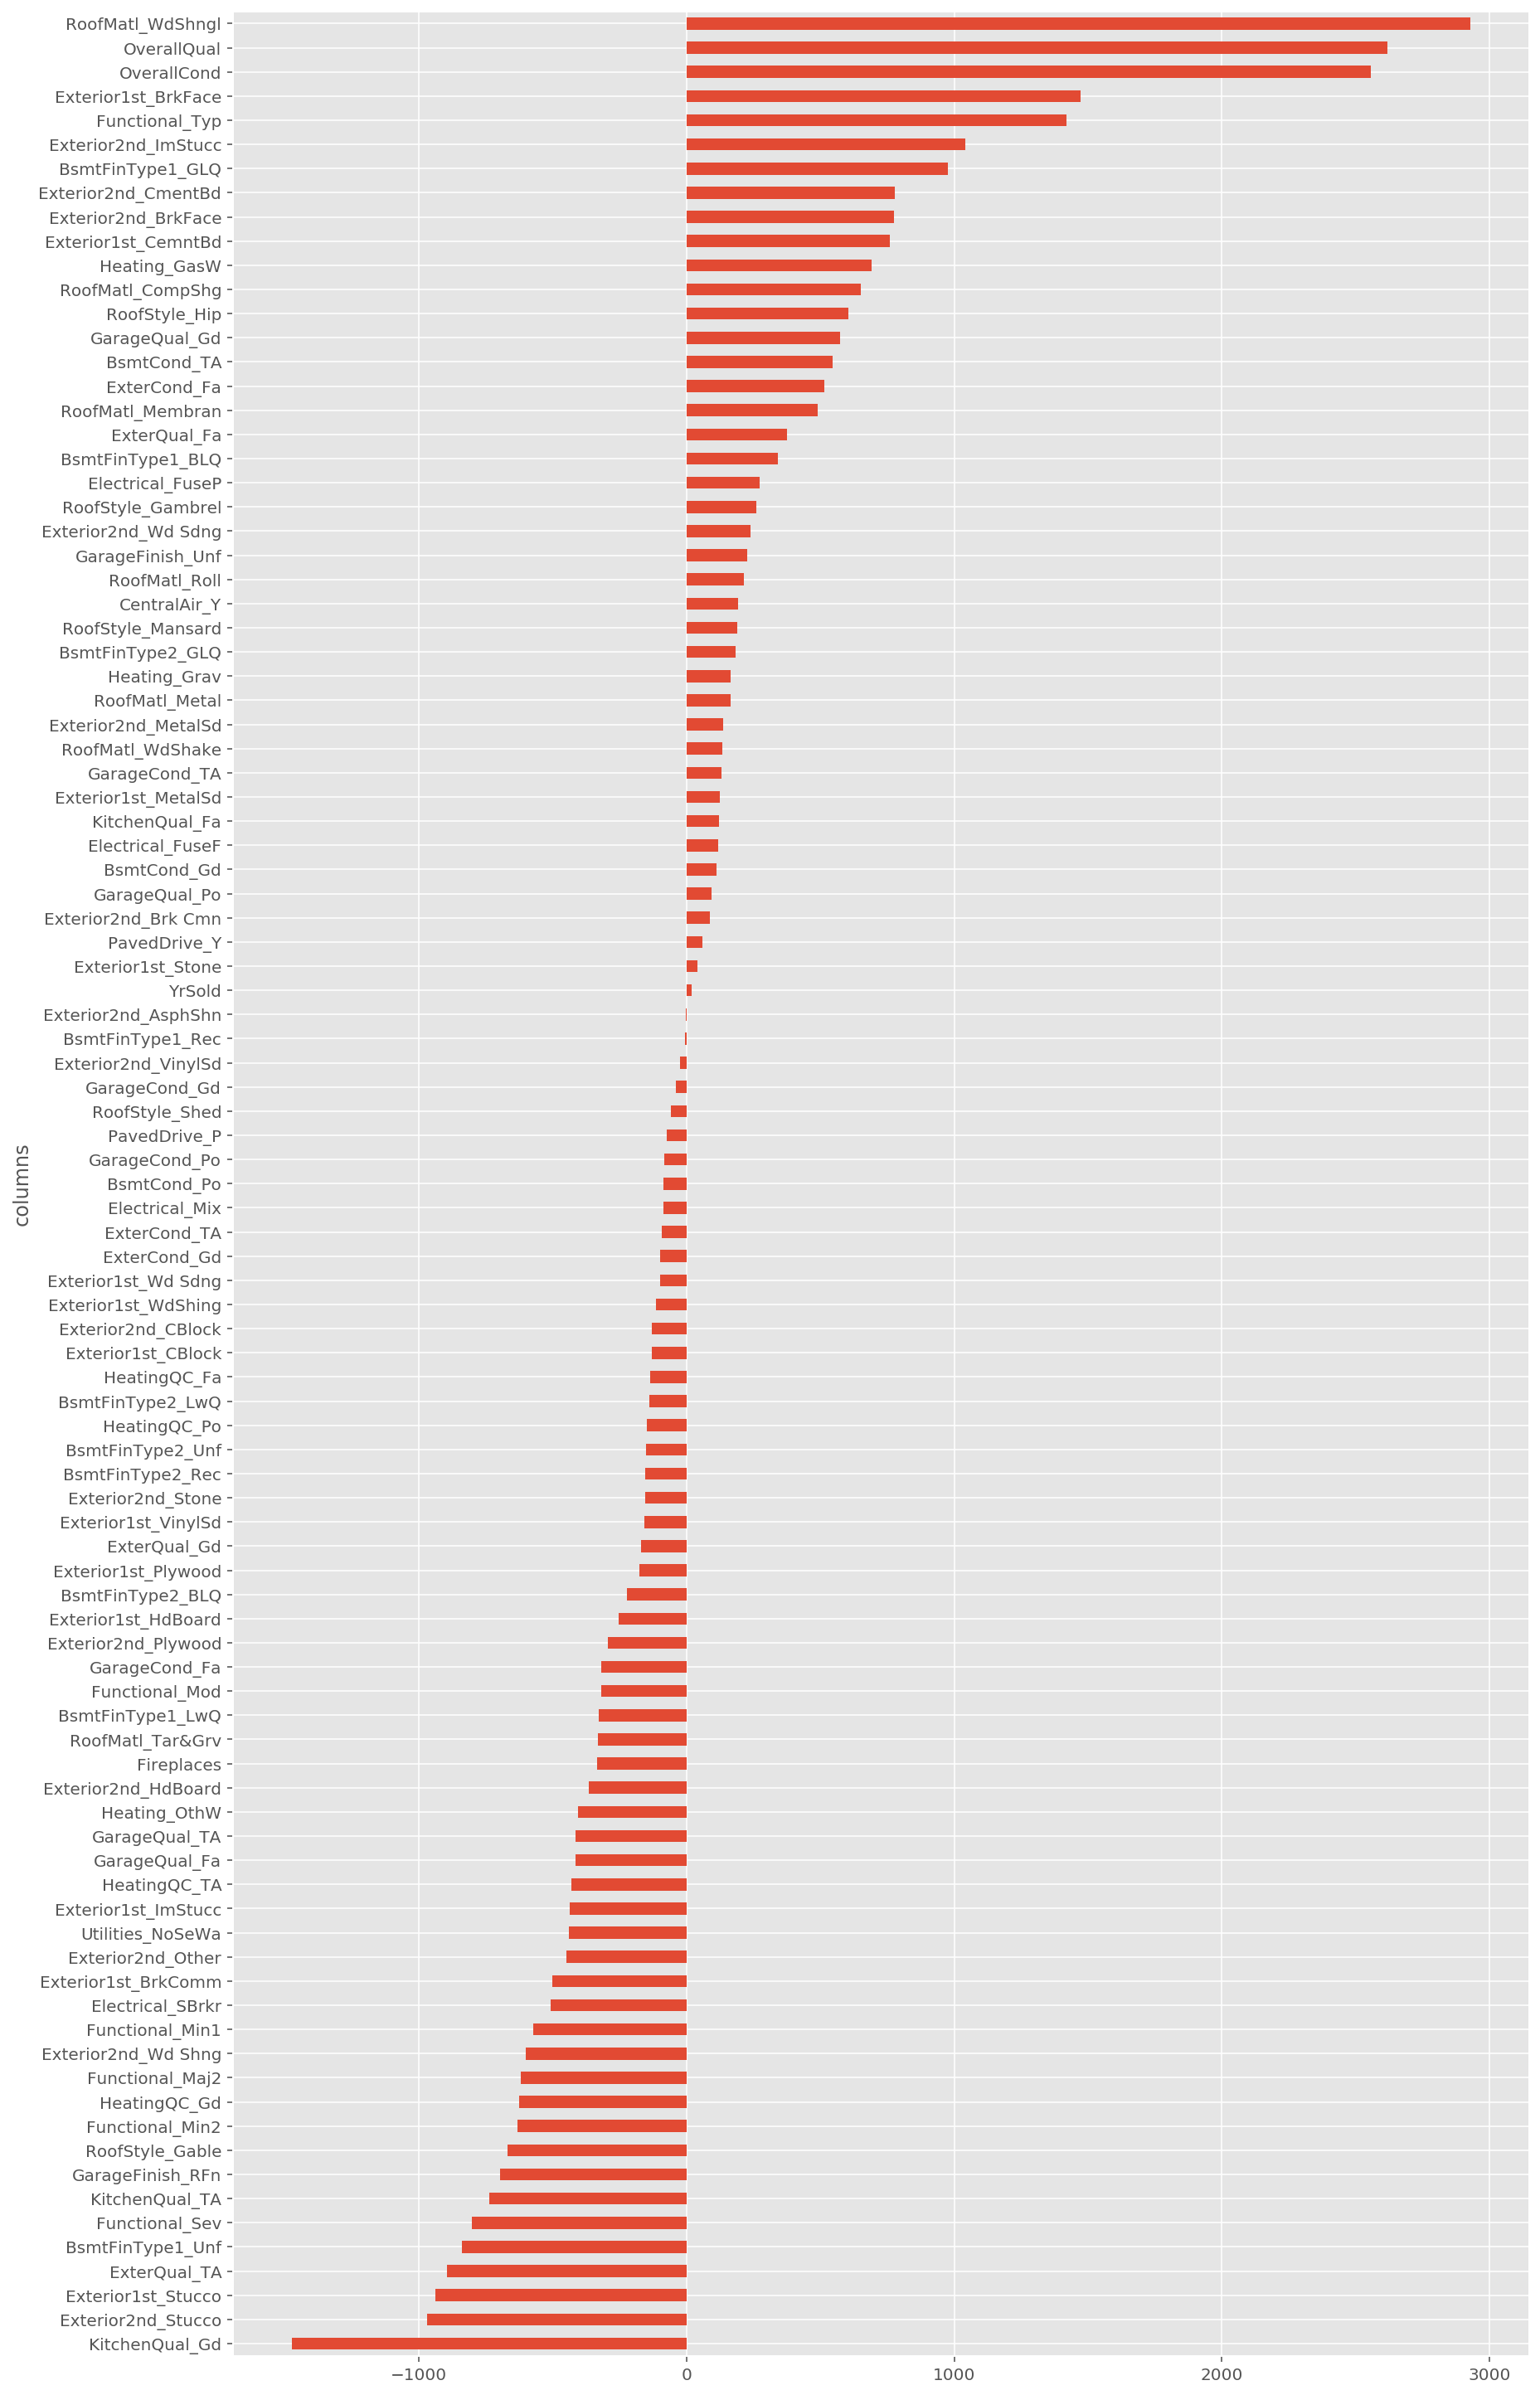

In [170]:
df_coef['coefficients'].sort_values().plot(kind='barh', figsize=(14,26));

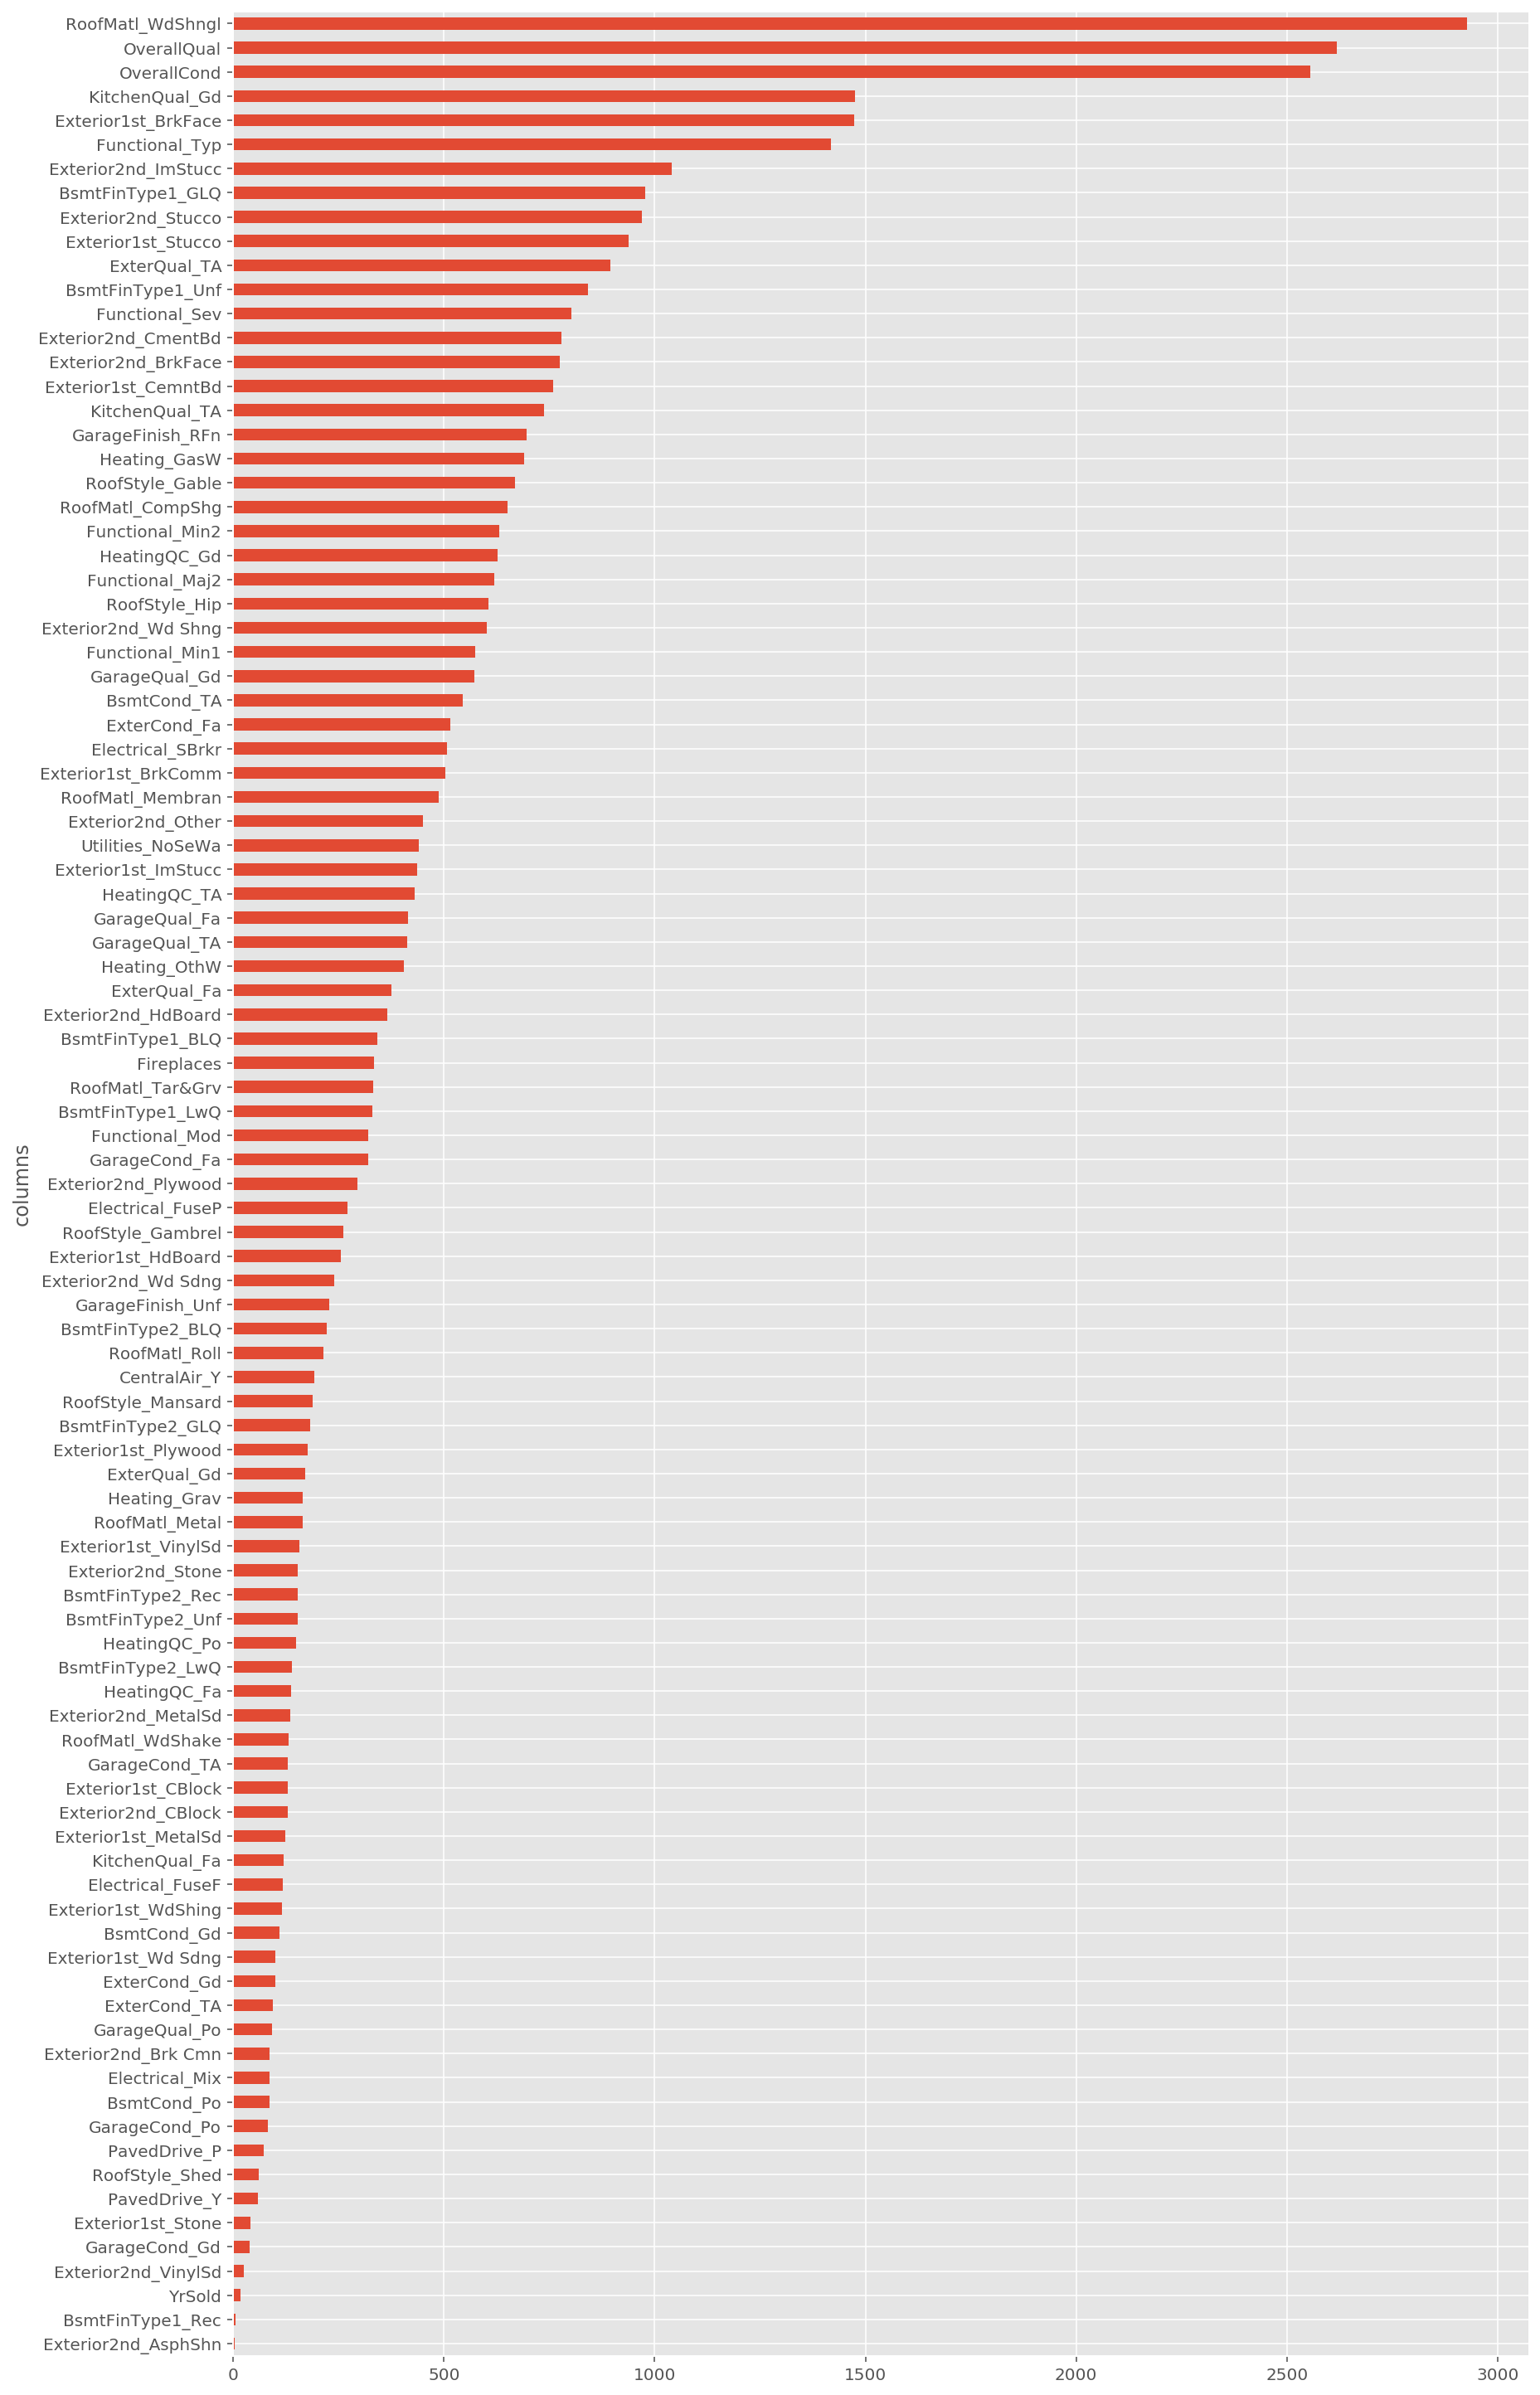

In [171]:
df_coef['coef_abs'].sort_values().plot(kind='barh', figsize=(14,26));

Your goals:

Evaluate the effect in dollars of the renovatable features.

How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money.

Investigate how much of the variance in price remaining is explained by these features.

Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [ ]:
# For a company to use this model:
# - since renovatable features are inherently features that can be changed, the renovatable features which provide
# the largest increase in house price should be renovated, to increase the price of the house
# - this would mean the company can prioritise these features, and make the most profit

In [ ]:
# The highest model coefficients are:
# - Roof Material - wood shingles (somewhat surprising)
# - Overall Quality
# - Overall Condition (these two are understandably high, which gives me a little faith in the model)

In [ ]:
# Given the very low training and test scores, I don't think the model can be relied on to be accurate
# However, the model coefficients make some sense

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. It is recommended to do some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [ ]:
# A: